In [298]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

In [299]:
pwd

u'/home/cbenitez'

In [300]:
cd

/home/cbenitez


In [301]:
h=0
def RK4(xxvv,time_step=h):

    k_1 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv))
    xxvv_1 = xxvv+k_1*h/2

    k_2 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_1))
    xxvv_2 = xxvv+k_2*h/2

    k_3 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_2))
    xxvv_3 = xxvv+k_3*h

    k_4 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_3))

    xxvv = xxvv + h/6.*(k_1+2.*k_2+2.*k_3+k_4)

    return xxvv

In [302]:
def vgalac2vcart(coord_galac,vel_galac):
    vvT = vel_galac.T
    ccT = coord_galac.T
    v_X = -vvT[0]*np.cos(ccT[2])*np.cos(ccT[1]) + vvT[1]*np.sin(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.cos(ccT[1])
    v_Y = -vvT[0]*np.cos(ccT[2])*np.sin(ccT[1]) - vvT[1]*np.cos(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.sin(ccT[1])
    v_Z = vvT[0]*np.sin(ccT[2]) + vvT[2]*np.cos(ccT[2])
    return np.array([v_X, v_Y, v_Z])

In [303]:
def cgalac2ccart(coord_galac):
    ccT = coord_galac.T
    XX = R0 - ccT[0]*np.cos(ccT[1])*np.cos(ccT[2])
    YY =    - ccT[0]*np.sin(ccT[1])*np.cos(ccT[2])
    ZZ =      ccT[0]*np.sin(ccT[2])
    return np.array([XX, YY, ZZ])

## Valores de las constantes de Oort para orbitas circulares en el potencial de Allen Santillan

A partir del potencial de Allen-Santillan (ecuaciones 2.7 a 2.10 en el texto (3/11/20)), podemos obtener la dependencia de la velocidad tangencial $V$ con respecto a $R$. Es usada la expresión 

\begin{equation}
    \frac{V_{\bot}^2}{R} = \nabla\phi\cdot\mathbf{\hat{R}} = -\mathbf{F}\cdot\mathbf{\hat{R}}, \label{ec vel circular}
\end{equation}

o lo que es lo mismo,

\begin{equation}
    V = (-\mathbf{F}\cdot\mathbf{R})^{1/2}.
\end{equation}

In [304]:
def V(R):
    return -np.linalg.norm(mt.vel_circ([R,0.,0.],mt.force_T))

In [305]:
def Om(R):
    return -np.linalg.norm(mt.vel_circ([R,0.,0.],mt.force_T))/R

In [306]:
RR = np.linspace(0,15,100)
ff = [np.linalg.norm(mt.vel_circ([R,0,0],mt.force_T)) for R in RR]

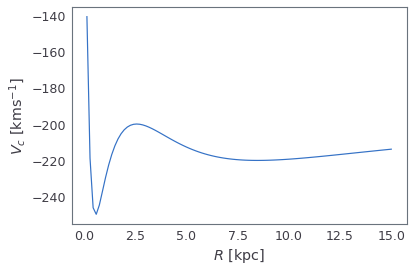

In [307]:
plt.plot(RR,[V(R)*mt.C.kpc.express(mt.C.km) for R in RR])
plt.xlabel("$R$ [kpc]")
plt.ylabel("$V_c$ [kms$^{-1}$]")
plt.show()

Realizando la derivada numérica $\partial_RV$ y evaluandola junto con $V(R)/R$ en $R_0$ obtenemos lo necesario para tener las constantes de Oort para el caso axisimétrico y con orbitas circulares en la vecindad solar.

In [308]:
def dVdR(R,h=1e-5):
    return 1./2/h*(V(R+h)-V(R-h))

In [309]:
def dOmdR(R,h=1e-5):
    return 1./2/h*(Om(R+h)-Om(R-h))

In [310]:
V(8)*mt.C.kpc.express(mt.C.km)

-219.91401545353452

In [311]:
1/2.*(dVdR(R0,h=1e-2)-V(R0)/R0)*mt.C.kpc.express(mt.C.km)

13.550371486121904

In [312]:
dVdR(R0,h=1e-2)

-1.2590720268129426e-17

In [313]:
V(R0)*mt.C.kpc.express(mt.C.km)/8

-27.489251931691815

In [314]:
dOmdR(8,h=1e-2)*8

8.782766182465038e-16

In [315]:
A = (dOmdR(8,h=1e-2)*8-Om(8))*mt.C.kpc.express(mt.C.km)/2
B = (dOmdR(8,h=1e-2)*8+Om(8))*mt.C.kpc.express(mt.C.km)/2

In [316]:
A,B

(27.29501576865099, -0.19423616304082203)

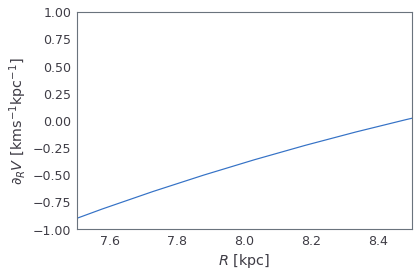

In [317]:
plt.plot(RR,[dVdR(R)*mt.C.kpc.express(mt.C.km) for R in RR])
plt.xlabel("$R$ [kpc]")
plt.ylabel("$\partial_RV$ [kms$^{-1}$kpc$^{-1}$]")
plt.xlim(7.5,8.5)
plt.ylim(-1,1)
plt.show()

In [320]:
R0 = 8.0
A = 1/2.*(dVdR(R0,h=1e-2)-V(R0)/R0)*mt.C.kpc.express(mt.C.km)
B = 1/2.*(dVdR(R0,h=1e-2)+V(R0)/R0)*mt.C.kpc.express(mt.C.km)
print(r"Los valores para las constantes de Oort son A = %g kms^{-1}kpc^{-1}, B= %g kms^{-1}kpc^{-1}"%(A,B))

Los valores para las constantes de Oort son A = 13.5504 kms^{-1}kpc^{-1}, B= -13.9389 kms^{-1}kpc^{-1}


In [324]:
V(8)*mt.C.kpc.express(mt.C.km)

-219.91401545353452

In [325]:
A,B

(13.550371486121904, -13.938880445569911)

In [326]:
oc.vell_model(np.array([.4,0.,0.]),[A,B,0,0]),oc.vell_model(np.array([.4,0.,0.]),[-A,-B,0,0])

(-0.15540358377920285, 0.15540358377920285)

In [327]:
p1,p2 = np.array([7.6,0.,0.]),np.array([8.,0.,0.])

In [328]:
v1,v2 = mt.vel_circ(np.array([7.6,0.,0.]),mt.force_T),mt.vel_circ(np.array([8.,0.,0.]),mt.force_T)
v1,v2


(array([ 0.00000000e+00, -7.11937974e-15,  0.00000000e+00]),
 array([ 0.00000000e+00, -7.12692921e-15,  0.00000000e+00]))

In [329]:
reload(oc)

<module 'oort_cons' from 'oort_cons.pyc'>

In [348]:
N = 120
R0 = 8.0
rc = .4
LSRs =  [np.append(np.array([R0,0.,0.]),mt.vel_circ(np.array([R0,0.,0.]),mt.force_T))]
#oo = [theta_f]
oo = [A,B,0.,0.]

In [375]:
ccgalac = np.array([[1. for i in range(N)],np.linspace(0.,1.-1./N,N),np.zeros(N)]).T*np.array([rc,2*np.pi,0.]) #espaciadas uniforme
cc = [oc.cgalac2ccart(c,LSRs[0][:3:]) for c in ccgalac]
vvOCr = np.array([oc.vr_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCl = np.array([oc.vell_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCb = np.array([oc.vb_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCgalac = np.array([[vvOCr[i],vvOCl[i],vvOCb[i]] for i in range(N)])
vvOC = [oc.vgalac2vcart(ccgalac[i],LSRs[0][:3:],vvOCgalac[i],LSRs[0][3::]) for i in range(N)]

In [376]:
cccart = np.array([oc.cgalac2ccart(c,LSRs[0][:3:]) for c in ccgalac])

In [377]:
vvcart = np.array([mt.vel_circ(c,mt.force_T) for c in cccart])

In [378]:
vvgalacconv = np.array([oc.vcart2vgalactic(cccart[i],LSRs[0][:3:],vvcart[i],LSRs[0][3::]) for i in range(N)])

In [379]:
A,B,theta_f

(13.550371486121904,
 -13.938880445569911,
 [13.530893758538703,
  13.563403305336681,
  -0.001747644105956886,
  -0.0004437370972270316])

In [383]:
vvOCgalac[0]*mt.C.kpc.express(mt.C.km),vvgalacconv[0]*mt.C.kpc.express(mt.C.km)

(array([ 0.        , -0.15540358, -0.        ]),
 array([ 0.        , 10.76274842,  0.        ]))

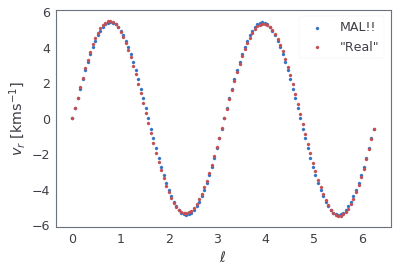

In [403]:
ll = np.linspace(0,1-1/100.,100)*2*np.pi
#plt.plot(ll,[oc.vell_model([.4,l,0.],theta_f) for l in ll])
plt.scatter(ccgalac[:,1],vvOCgalac[:,0]*mt.C.kpc.express(mt.C.km),s=10,label="MAL!!")
plt.scatter(ccgalac[:,1],vvgalacconv[:,0]*mt.C.kpc.express(mt.C.km),s=10,c='r',label="\"Real\"")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$v_{r}\,\,[\mathrm{kms^{-1}}]$")
plt.legend()

In [35]:
import contextlib
from multiprocessing import Pool
import emcee as mc

In [39]:
def vb_model(c,theta):
    A,B,C,K = theta
    #return -c[0]*np.sin(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+v_LSR[0]*np.sin(c[2])*np.cos(c[1])+v_LSR[1]*np.sin(c[2])*np.sin(c[1])
    #return -c[0]*np.sin(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+mvz1(c[0]*np.sin(c[2]))*np.cos(c[2])
    return -c[0]*np.sin(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))

def vell_model(c,theta):
    A,B,C,K = theta
    #return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])-C*np.sin(2*c[1]))-v_LSR[0]*np.sin(c[1])-v_LSR[1]*np.cos(c[1])
    return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])+C*np.sin(2*c[1]))

def vr_model(c,theta):
    A,B,C,K = theta
    #return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])-C*np.sin(2*c[1]))-v_LSR[0]*np.sin(c[1])-v_LSR[1]*np.cos(c[1])
    #return c[0]*np.cos(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+mvz1(c[0]*np.sin(c[2]))*np.sin(c[2])
    return c[0]*np.cos(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))

In [40]:
def log_likelihood(theta, coords, vels):
    #A,B,C,K = theta
    vreq = [vr_model(c,theta) for c in coords]
    velleq = [vell_model(c,theta) for c in coords]
    vbeq = [vb_model(c,theta) for c in coords]
    vvr = np.array([v[0] for v in vels])
    vvell = np.array([v[1] for v in vels])
    vvb = np.array([v[2] for v in vels])

    #return -0.5 * np.sum(np.sqrt((vvr - vreq)** 2) + np.sqrt((vvell - velleq)** 2) + np.sqrt((vvb - vbeq)** 2) )
    return -0.5 * np.sum(np.sqrt((vvr - vreq)** 2) + np.sqrt((vvell - velleq)** 2) )

def log_prior(theta):
    A,B,C,K = theta
    #if -20.0 < A < 20 and -20 < B < 20.0 and -20.0 < C < 20.0 and -20.<K<20.:
    #    return 0.0
    #return -np.inf
    return 0.0

def log_probability(theta, coords, vels):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, coords, vels)

def log_likelihood_global(theta):
    #A,B,C,K = theta
    vreq = [vr_model(c,theta) for c in coords]
    velleq = [vell_model(c,theta) for c in coords]
    vbeq = [vb_model(c,theta) for c in coords]
    vvr = np.array([v[0] for v in vels])
    vvell = np.array([v[1] for v in vels])
    vvb = np.array([v[2] for v in vels])
    return -.5*np.sum(np.sqrt( (vvr - vreq)** 2 + (vvell - velleq)** 2 ))

def log_probability_global(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_global(theta)

In [54]:
Nsteps=4000
Nwalkers=50
r_LSR=[8.,0.,0.]
r_LSR = np.array(r_LSR)
v_LSR = mt.vel_circ(r_LSR,mt.force_T,)*mt.C.kpc.express(mt.C.km)

vv_galac = np.array(vvgalacconv)*mt.C.kpc.express(mt.C.km)
cc_galac = np.array(ccgalac)

global coords, vels
coords = cc_galac
vels = vv_galac

random_seed = 42
np.random.seed(random_seed)

In [55]:
soln = np.array([0.,0.,0.,0.])
pos = soln + 10 * (np.random.rand(Nwalkers, 4)*2.-1.)
nwalkers, ndim = pos.shape

In [56]:
with contextlib.closing(Pool()) as pool:
    sampler = mc.EnsembleSampler(Nwalkers, ndim, log_probability_global, pool=pool)
    sampler.run_mcmc(pos, Nsteps,progress=True);

100%|██████████| 4000/4000 [01:17<00:00, 51.86it/s]


In [61]:
flat_samples = sampler.get_chain(discard=1000, flat=True)

In [62]:
mcmc = [np.percentile(flat_samples[:, i], [16, 50, 84]) for i in range(ndim)]
qq = [np.diff(mcmc[i]) for i in range(ndim)]
theta_f = [par[1] for par in mcmc]

In [63]:
print "[A, B, C, D]:",theta_f

[A, B, C, D]: [13.530893758538703, 13.563403305336681, -0.001747644105956886, -0.0004437370972270316]


In [64]:
sampler.acor

array([36.3361563 , 45.9276263 , 33.12909798, 32.87110261])

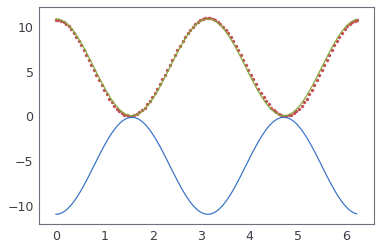

In [394]:
ll = np.linspace(0,1-1/100.,100)*2*np.pi
plt.plot(ll,[oc.vell_model([.4,l,0.],[-A,B,0.,0.]) for l in ll])
plt.plot(ll,[oc.vell_model([.4,l,0.],theta_f) for l in ll])
#plt.scatter(ccgalac[:,1],vvOCgalac[:,1]*mt.C.kpc.express(mt.C.km),s=10)
plt.scatter(ccgalac[:,1],vvgalacconv[:,1]*mt.C.kpc.express(mt.C.km),s=10,c='r')

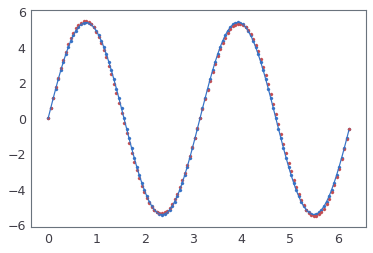

In [343]:
ll = np.linspace(0,1-1/100.,100)*2*np.pi
plt.plot(ll,[oc.vr_model([.4,l,0.],[A,B,0.,0.]) for l in ll])
plt.scatter(ccgalac[:,1],vvOCgalac[:,0]*mt.C.kpc.express(mt.C.km),s=10)
plt.scatter(ccgalac[:,1],vvgalacconv[:,0]*mt.C.kpc.express(mt.C.km),s=10,c='r')

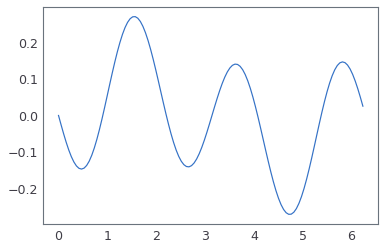

In [344]:
plt.plot(ccgalac[:,1],vvOCgalac[:,0]*mt.C.kpc.express(mt.C.km)-vvgalacconv[:,0]*mt.C.kpc.express(mt.C.km))

In [355]:
(v1-v2)*mt.C.kpc.express(mt.C.km),om*.4*mt.C.kpc.express(mt.C.km)

(array([0.        , 0.23295235, 0.        ]),
 array([ -0.        ,  -0.        , -10.99570077]))

In [384]:
def varOort(N=120,):

    LSRs =  [np.append(np.array([R0,0.,0.]),mt.vel_circ(np.array([R0,0.,0.]),mt.force_T))]
    NT = 100
    global h
    h = 0.0199009793340327*2.65860467535e+15/NT
    on= 2
    for i in range(on):
        rv_LSRn = LSRs[-1]
        with mt.contextlib.closing(mt.Pool()) as pool:
                    for nt in range(NT):
                        rv_LSRn = RK4([rv_LSRn])[0]
        LSRs.append(rv_LSRn)


    ccgalac = np.array([[1. for i in range(N)],np.linspace(0.,1.-1./N,N),np.zeros(N)]).T*np.array([rc,2*np.pi,0.]) #espaciadas uniforme
    cc = [oc.cgalac2ccart(c,LSRs[0][:3:]) for c in ccgalac]
    vvOC = np.array([mt.vel_circ(c,mt.force_T) for c in cc])

    xxvvOC = np.array([np.append(cc[i],vvOC[i]) for i in range(N)])
    resOC = [xxvvOC]
    for i in range(on):
        xxvvOC_n = resOC[-1]
        with mt.contextlib.closing(mt.Pool()) as pool:
                    for nt in range(NT):
                        xxvvOC_n = list(pool.map(RK4,[xxvvOC_n])[0])
        resOC.append(xxvvOC_n)

    return LSRs,resOC


In [385]:
prue = varOort()

In [386]:
prue1,prue2 = np.array(prue[0]),np.array(prue[1])

Text(0,0.5,'$Y\\,\\, [\\mathrm{kpc}]$')

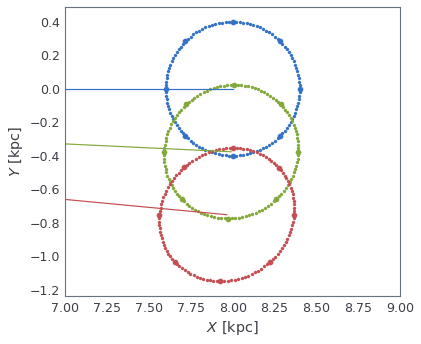

In [393]:
plt.figure(figsize=(6,6))
pr0 = np.array(prue2[0])
pr1 = np.array(prue2[1])
pr2 = np.array(prue2[2])
plt.scatter(pr0[::15,0],pr0[::15,1],s=30,c="b")
plt.scatter(pr1[::15,0],pr1[::15,1],s=30,c="g")
plt.scatter(pr2[::15,0],pr2[::15,1],s=30,c="r")
plt.scatter(pr0[:,0],pr0[:,1],s=10,c="b")
plt.scatter(pr1[:,0],pr1[:,1],s=10,c="g")
plt.scatter(pr2[:,0],pr2[:,1],s=10,c="r")
plt.plot([0,prue1[0][0]],[0,prue1[0][1]])
plt.plot([0,prue1[1][0]],[0,prue1[1][1]])
plt.plot([0,prue1[2][0]],[0,prue1[2][1]])
plt.xlim(7,9)
plt.gca().set_aspect('equal')
plt.xlabel("$X\,\, [\mathrm{kpc}]$")
plt.ylabel("$Y\,\, [\mathrm{kpc}]$")

In [248]:
oc.cart2galactic(pr1[0][:3:],prue1[1][:3:])[1]/h/100*.4*mt.C.kpc.express(mt.C.km)

10.754509741728224

In [ ]:
mt.vel_circ()

Se generará ahora una muestra de particulas con coordenadas dentro del arreglo `cc`. Las coordenadas de estas particulas serán escogidas de manera aleatoria en un circulo de radio $r=.4 \ \mathrm{kpc}$ alrededor de la posición inicial del Sol, $R_{LSR}=(8,0,0)\ \mathrm{kpc}$. A estás particulas se les asignarán: i) velocidades circulares calculadas directamente con el potencial de Allen-Santillan que guardaremos en el arreglo `vvAS` y ii) velocidades calculadas a partir de las constantes de Oort usando las ecuaciones para $v_r$, $v_{\ell}$ y $v_b$ y se guardarán en el arreglo `vvOC`. Aunque las coordenadas de las particulas en ambos casos i) y ii) son las mismas, a partir de ahora nos referiremos como la muestra i y muestra ii a las particulas cuyas velocidades están en `vvAS` y `vvOC` respectivamente. En ambos casos las velocidades en cada rreglo están en el sistema de coordenadas inercial.

In [13]:
N=100
#cc = oc.m3b_coord(N,.39,.4,0.,[0,1,0]).T+np.array([R0,0,0]) random
#ccgalac = np.array([oc.cart2galactic(c,np.array([R0,0.,0.])) for c in cc])
ccgalac = np.array([[1. for i in range(N)],np.linspace(0.,1.,N),np.zeros(N)]).T*np.array([.4,2*np.pi,0.]) #espaciadas uniforme
cc = cgalac2ccart(ccgalac).T

In [14]:
vvAS = np.array([mt.vel_circ(c,mt.force_T) for c in cc])

In [15]:
vvOCr = np.array([oc.vr_model(c,np.array([A,B,0,0]))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCl = np.array([oc.vell_model(c,np.array([A,B,0,0]))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCb = np.array([oc.vb_model(c,np.array([A,B,0,0]))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCgalac = np.array([[vvOCr[i],vvOCl[i],vvOCb[i]] for i in range(N)])
vvOC = vgalac2vcart(ccgalac,vvOCgalac).T+mt.vel_circ(np.array([R0,0.,0.]),mt.force_T)

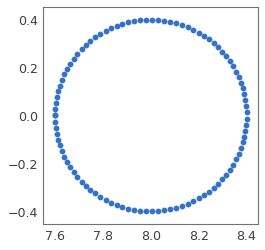

In [16]:
plt.scatter(cc[:,0],cc[:,1])
plt.gca().set_aspect('equal')
plt.show()

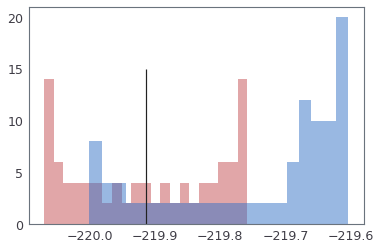

In [17]:
axisc=1
plt.hist(vvOC[:,axisc]*mt.C.kpc.express(mt.C.km),alpha=.5,color='r',bins=21)
plt.hist(vvAS[:,axisc]*mt.C.kpc.express(mt.C.km),color='b',alpha=.5,bins=21)
plt.vlines(mt.vel_circ(np.array([R0,0.,0.]),mt.force_T)[axisc]*mt.C.kpc.express(mt.C.km),0,15)
plt.show()

In [18]:
xxvvOC = np.array([np.append(cc[i],vvOC[i]) for i in range(N)])
xxvvAS = np.array([np.append(cc[i],vvAS[i]) for i in range(N)])

In [19]:
resOC = [xxvvOC]
resAS = [xxvvAS]
LSRs =  [np.append(np.array([R0,0.,0.]),mt.vel_circ(np.array([R0,0.,0.]),mt.force_T))]
NT = 200
h = 0.0199009793340327*2.65860467535e+15/NT
on= 10 
for i in range(on):
    rv_LSRn = LSRs[-1]
    xxvvOC_n = resOC[-1]
    xxvvAS_n = resAS[-1]
    with mt.contextlib.closing(mt.Pool()) as pool:
                for nt in range(NT):
                    rv_LSRn = RK4([rv_LSRn])[0]
                    xxvvOC_n = list(pool.map(RK4,[xxvvOC_n])[0])
                    xxvvAS_n = list(pool.map(RK4,[xxvvAS_n])[0])
    resOC.append(xxvvOC_n)
    resAS.append(xxvvAS_n)
    LSRs.append(rv_LSRn)

In [20]:
auxtt2 = np.linspace(-np.pi,np.pi,200)
auxtt = np.linspace(np.pi/4,-np.pi/2,500)

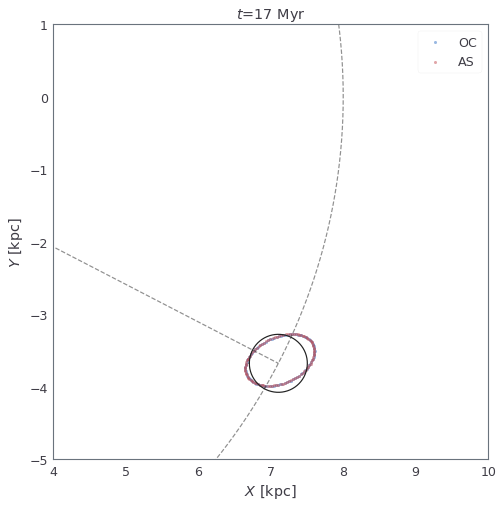

In [21]:
ic=10
plt.figure(figsize=(8,8))
plt.plot([0,R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],[0,R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],ls="--",c='k',alpha=.5)
plt.plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(.4*np.cos(auxtt2)+R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),.4*np.sin(auxtt2)+R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),ls="-",c='k',alpha=1)
plt.scatter(np.array(resOC[ic])[:,0],np.array(resOC[ic])[:,1],c="b",alpha=.5,s=8,label="OC")
plt.scatter(np.array(resAS[ic])[:,0],np.array(resAS[ic])[:,1],c="r",alpha=.5,s=8,label="AS")
plt.xlim(4,10)
plt.ylim(-5,1)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

Son graficadas las msimas particulas pero para el marco de referencia galáctico.

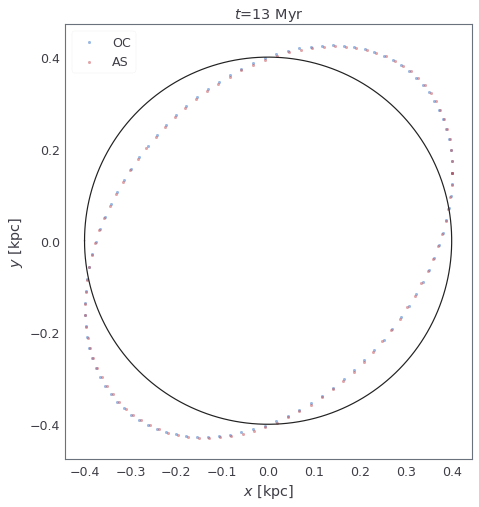

In [50]:
ic=8
plt.figure(figsize=(8,8))
plt.plot(.4*np.cos(auxtt2),.4*np.sin(auxtt2),ls="-",c='k',alpha=1)
plt.scatter(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resOC[ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resOC[ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resOC[ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resOC[ic]])[:,1]),c="b",alpha=.5,s=8,label="OC")
plt.scatter(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resAS[ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resAS[ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resAS[ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resAS[ic]])[:,1]),c="r",alpha=.5,s=8,label="AS")
#plt.xlim(4,10)
#plt.ylim(-5,1)
plt.xlabel("$x$ [kpc]")
plt.ylabel("$y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

________________

Se define una función que lleva a cabo lo anterior pero para un conjunto de varios elementos $[A,B,C,K]$. Los sets de constantes de Oort que usaremos son dos, uno que varía unicamente $A$ y otro que varía unicamente $B$, ambos manteniendo $C=K=0$.

In [26]:
def varOort(ooo,N=100,):
    
    LSRs =  [np.append(np.array([R0,0.,0.]),mt.vel_circ(np.array([R0,0.,0.]),mt.force_T))]
    NT = 200
    h = 0.0199009793340327*2.65860467535e+15/NT
    on= 10 
    for i in range(on):
        rv_LSRn = LSRs[-1]
        with mt.contextlib.closing(mt.Pool()) as pool:
                    for nt in range(NT):
                        rv_LSRn = RK4([rv_LSRn])[0]
        LSRs.append(rv_LSRn)
            
    rrrOC = []
    
    for oo in ooo: 
        ccgalac = np.array([[1. for i in range(N)],np.linspace(0.,1.,N),np.zeros(N)]).T*np.array([.4,2*np.pi,0.]) #espaciadas uniforme
        cc = cgalac2ccart(ccgalac).T
        vvOCr = np.array([oc.vr_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
        vvOCl = np.array([oc.vell_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
        vvOCb = np.array([oc.vb_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
        vvOCgalac = np.array([[vvOCr[i],vvOCl[i],vvOCb[i]] for i in range(N)])
        vvOC = vgalac2vcart(ccgalac,vvOCgalac).T+mt.vel_circ(np.array([R0,0.,0.]),mt.force_T)
        xxvvOC = np.array([np.append(cc[i],vvOC[i]) for i in range(N)])
        resOC = [xxvvOC]
        for i in range(on):
            xxvvOC_n = resOC[-1]
            with mt.contextlib.closing(mt.Pool()) as pool:
                        for nt in range(NT):
                            xxvvOC_n = list(pool.map(RK4,[xxvvOC_n])[0])
            resOC.append(xxvvOC_n)
        rrrOC.append(resOC)
    return LSRs,rrrOC

In [54]:
oooA = np.array([[A+i,B,0.,0.] for i in range(-6,7)])

In [55]:
oooA = np.array([[A,B+i,0.,0.] for i in range(-6,7)])

In [56]:
oooA2 = np.array([[A+4*i,B,0.,0.] for i in range(-7,1)])

In [57]:
oooB2 = np.array([[A,B+4*i,0.,0.] for i in range(0,8)])

In [58]:
evolsA2 = varOort(oooA2)

In [59]:
evolsB2 = varOort(oooB2)

In [60]:
np.save('evolsA2',evolsA2),np.save('evolsB2',evolsB2)

(None, None)

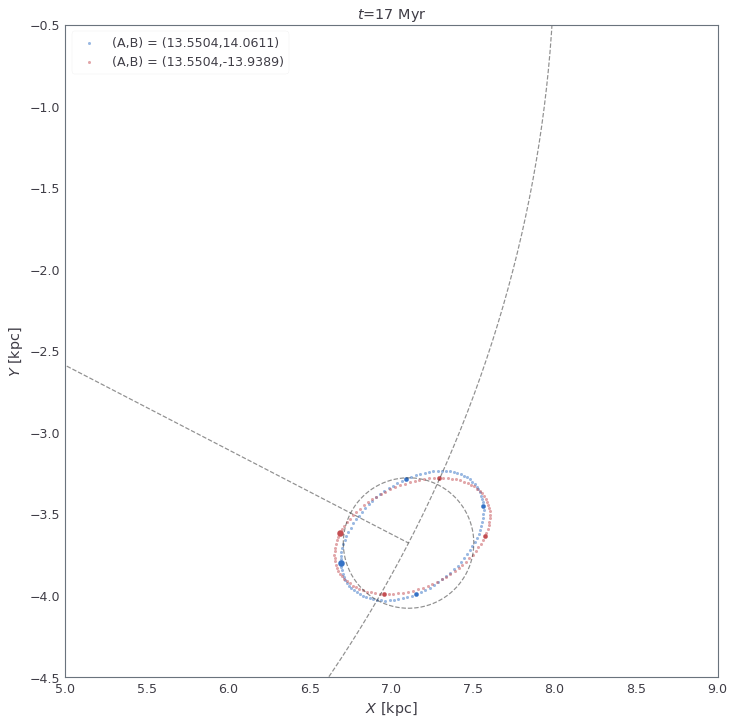

In [92]:
ic=10
OCc2=0
OCc1=7
evols = evolsB2[1]
oooc = oooB2
plt.figure(figsize=(12,12))
plt.scatter(np.array(evols[OCc1][ic])[0,0],np.array(evols[OCc1][ic])[0,1],c="b",alpha=1,s=40)
plt.scatter(np.array(evols[OCc2][ic])[0,0],np.array(evols[OCc2][ic])[0,1],c="r",alpha=1,s=40)
plt.scatter(np.array(evols[OCc1][ic])[0:-1:25,0],np.array(evols[OCc1][ic])[0:-1:25,1],c="b",alpha=1,s=20)
plt.scatter(np.array(evols[OCc2][ic])[0:-1:25,0],np.array(evols[OCc2][ic])[0:-1:25,1],c="r",alpha=1,s=20)
plt.plot([0,R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],[0,R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],ls="--",c='k',alpha=.5)
plt.plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(.4*np.cos(auxtt2)+R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),.4*np.sin(auxtt2)+R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),ls="--",c='k',alpha=.5)
plt.scatter(np.array(evols[OCc1][ic])[:,0],np.array(evols[OCc1][ic])[:,1],c="b",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc1][0],oooc[OCc1][1]))
plt.scatter(np.array(evols[OCc2][ic])[:,0],np.array(evols[OCc2][ic])[:,1],c="r",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc2][0],oooc[OCc2][1]))
plt.xlim(5,9)
plt.ylim(-4.5,-.5)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [34]:
ic=10
OCc2=0
OCc1=7
eLSRs,evols = evolsB2
oooc = oooB
plt.figure(figsize=(8,8))
plt.plot(.4*np.cos(auxtt2),.4*np.sin(auxtt2),ls="-",c='k',alpha=1)
plt.scatter(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in resOC[ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resOC[ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,1]),c="b",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc1][0],oooc[OCc1][1]))
plt.scatter(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in resAS[ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in resAS[ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],LSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,1]),c="r",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc2][0],oooc[OCc2][1]))
#plt.xlim(4,10)
#plt.ylim(-5,1)
plt.xlabel("$x$ [kpc]")
plt.ylabel("$y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

NameError: name 'oooB' is not defined

_______

<Figure size 432x288 with 0 Axes>

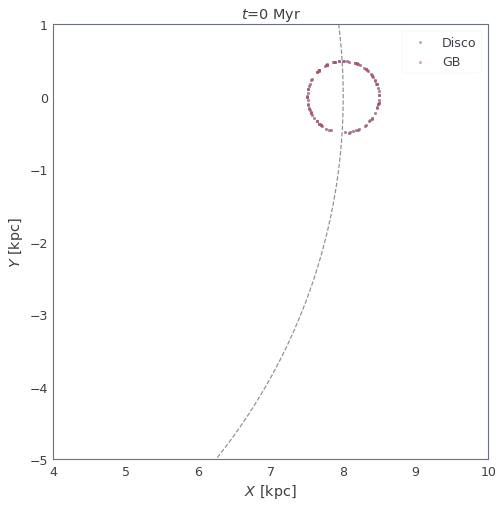

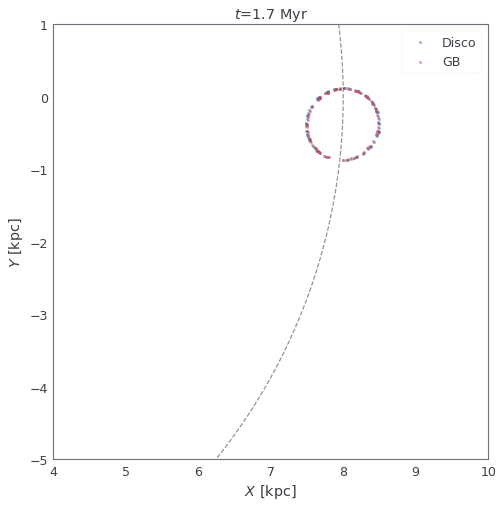

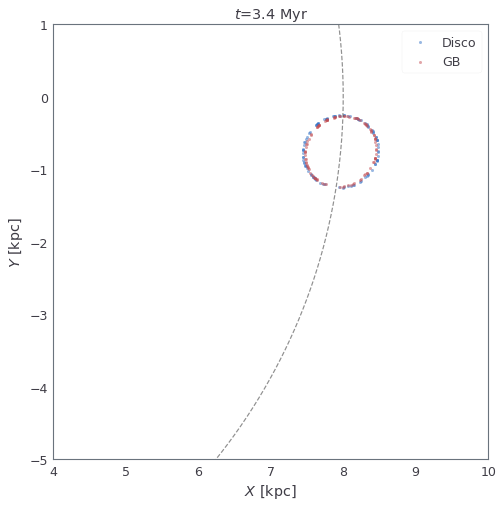

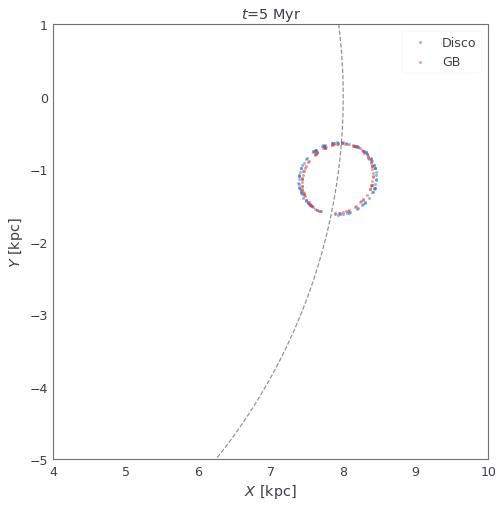

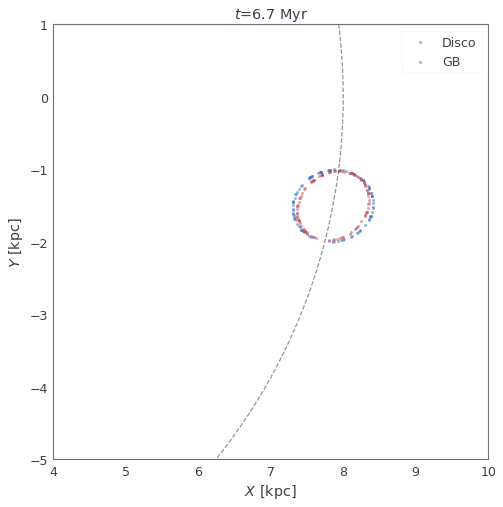

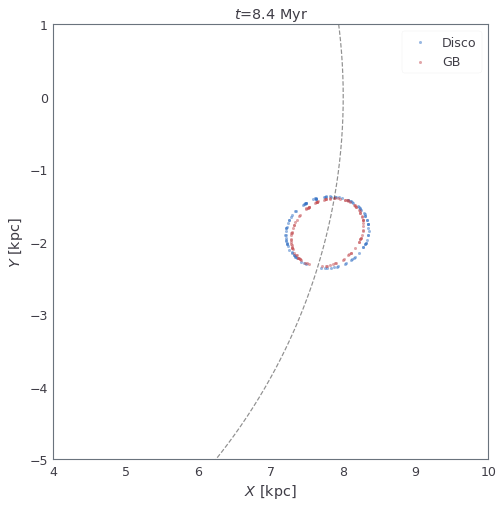

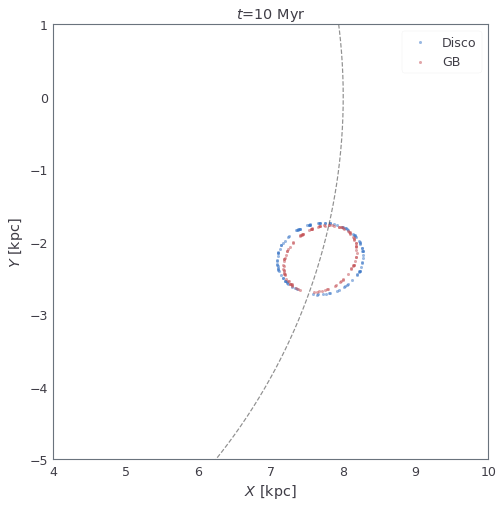

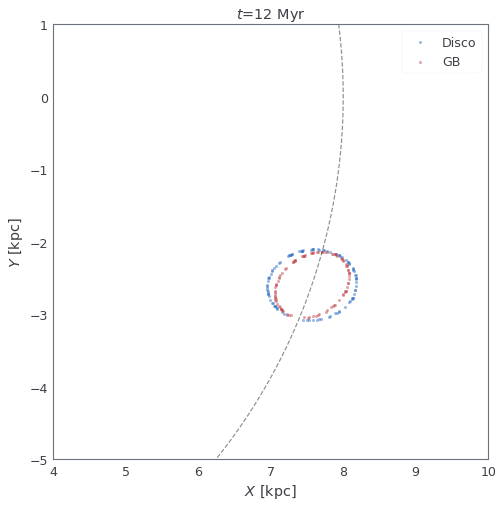

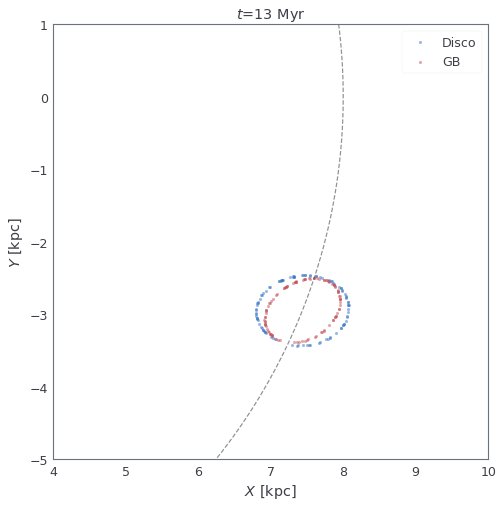

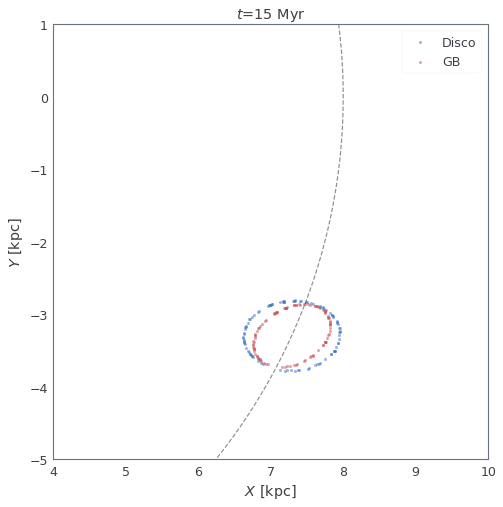

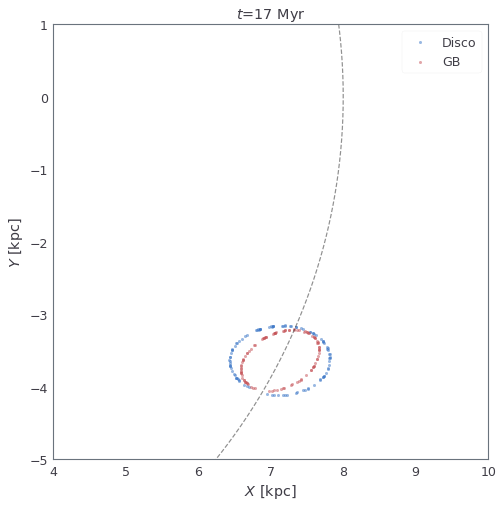

In [120]:
fig = plt.figure()

ims = []
for ic in range(len(resultados)):
    plt.figure(figsize=(8,8))
    plt.plot(8*np.cos(auxtt),8*np.sin(auxtt),ls="--",c='k',alpha=.5)
    #plt.scatter(np.array(resultados[0]).T[0],np.array(resultados[0]).T[1],c="k",alpha=.5,s=8)
    plt.scatter(np.array(resultados[ic]).T[0],np.array(resultados[ic]).T[1],c="b",alpha=.5,s=8,label="Disco")
    plt.scatter(np.array(resultadosrg[ic]).T[0],np.array(resultadosrg[ic]).T[1],c="r",alpha=.5,s=8,label="GB")
    plt.xlim(4,10)
    plt.ylim(-5,1)
    plt.xlabel("$X$ [kpc]")
    plt.ylabel("$Y$ [kpc]")
    plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

In [13]:
evolsA2 = np.load('evolsA2.npy')

In [14]:
np.shape(evolsA2[1])

(8, 11, 100, 6)

In [15]:
oooA2 = np.array([[A+4*i,B,0.,0.] for i in range(-7,1)])

In [16]:
auxtt2 = np.linspace(-np.pi,np.pi,200)
auxtt = np.linspace(np.pi/4,-np.pi/2,500)

In [17]:
np.shape(evols)

NameError: name 'evols' is not defined

<Figure size 432x288 with 0 Axes>

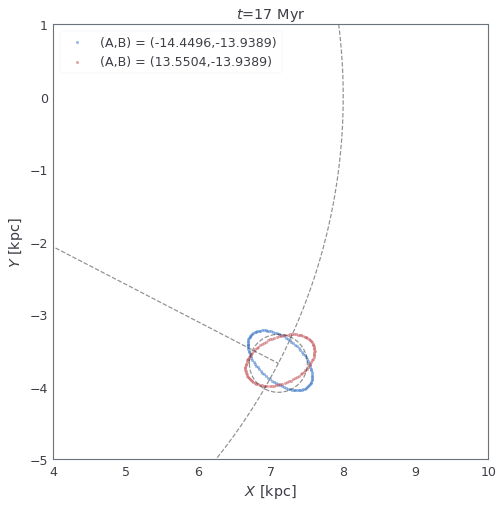

In [18]:
ic=10
OCc2=7
OCc1=0
eLSRs,evols = evolsA2
oooc = oooA2
fig = plt.figure()
plt.figure(figsize=(8,8))
plt.plot([0,R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],[0,R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic)],ls="--",c='k',alpha=.5)
plt.plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(.4*np.cos(auxtt2)+R0*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),.4*np.sin(auxtt2)+R0*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),ls="--",c='k',alpha=.5)
#plt.scatter(np.array(resultados[0]).T[0],np.array(resultados[0]).T[1],c="k",alpha=.5,s=8)
plt.scatter(np.array(evols[OCc1][ic])[:,0],np.array(evols[OCc1][ic])[:,1],c="b",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc1][0],oooc[OCc1][1]))
plt.scatter(np.array(evols[OCc2][ic])[:,0],np.array(evols[OCc2][ic])[:,1],c="r",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc2][0],oooc[OCc2][1]))
plt.xlim(4,10)
plt.ylim(-5,1)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

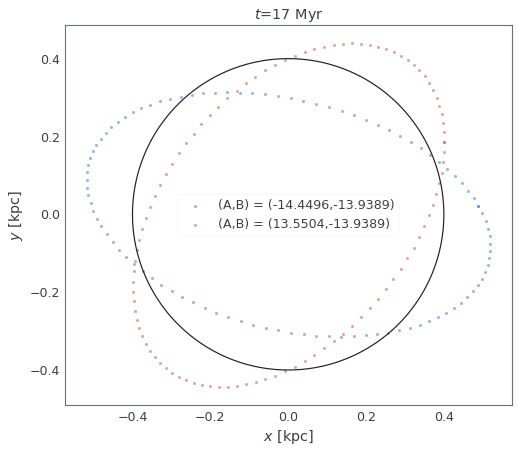

In [19]:
ic=10
OCc2=7
OCc1=0
eLSRs,evols = evolsA2
oooc = oooA2
plt.figure(figsize=(8,8))
plt.plot(.4*np.cos(auxtt2),.4*np.sin(auxtt2),ls="-",c='k',alpha=1)
plt.scatter(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])[:,1]),c="b",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc1][0],oooc[OCc1][1]))
plt.scatter(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,0]*np.cos(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,1]),np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,0]*np.sin(np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc2][ic]])[:,1]),c="r",alpha=.5,s=8,label="(A,B) = (%g,%g)"%(oooc[OCc2][0],oooc[OCc2][1]))
#plt.xlim(4,10)
#plt.ylim(-5,1)
plt.xlabel("$x$ [kpc]")
plt.ylabel("$y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

_______

In [20]:
?np.fft.fftfreq(len(fft_vi)

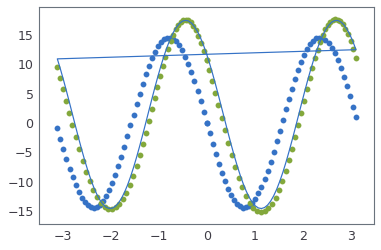

In [137]:
ic=0
ic2=4
OCc=0
vindex=0
eLSRs,evols = evolsA2
oooc = oooA2
v_galac = np.array([oc.vcart2vgalactic(xv[0:3],eLSRs[ic][0:3],xv[3::],eLSRs[ic][3::])*mt.C.kpc.express(mt.C.km) for xv in np.array(evols[OCc][ic])])
c_galac = np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc1][ic]])
v_galac2 = np.array([oc.vcart2vgalactic(xv[0:3],eLSRs[ic2][0:3],xv[3::],eLSRs[ic2][3::])*mt.C.kpc.express(mt.C.km) for xv in np.array(evols[OCc][ic2])])
c_galac2 = np.array([oc.cart2galactic(c[:3:],eLSRs[ic2][:3:]) for c in evols[OCc1][ic2]])
plt.scatter(c_galac[:,1],v_galac[:,vindex]/c_galac[:,0])
plt.scatter(c_galac2[:,1],v_galac2[:,vindex]/c_galac[:,0])
kp,cp,ap,phip = 2.79235908/2,6.90537776,14.42640716,2
plt.plot(c_galac[:,1],kp+cp*np.cos(2*c_galac[:,1]+phip)+ap*np.sin(2*c_galac[:,1]+phip))

In [165]:
2./len(fft_vi)*fft_vi[[0,2]]

array([2.79235908 +0.j        , 6.90537776+14.42640716j])

\begin{align*}
f_r &= K + C\cos(2\ell+\phi) + A\sin(2\ell+\phi)\\
 &= K + [C\cos\phi +A\sin\phi]\cos(2\ell) + [-C\sin\phi +A\cos\phi]\sin(2\ell)
\end{align*}

In [169]:
fft_vi

array([ 1.39617954e+02+0.00000000e+00j,  9.03719467e+00+7.99383054e+00j,
        3.45268888e+02+7.21320358e+02j,  9.39598142e+00-1.77549670e+01j,
        6.39649411e+01-5.84332125e+01j, -3.80613006e+00-6.77817912e+00j,
       -7.51784532e+00-9.69559773e+00j, -4.53001065e-01-3.10562873e+00j,
       -4.29749821e-01-2.24417321e+00j,  2.13610801e-01-2.69716710e+00j,
        3.67519022e-01-2.39551972e+00j,  3.62316307e-01-2.18801058e+00j,
        4.28951680e-01-1.99052772e+00j,  4.78652416e-01-1.81026568e+00j,
        5.18473467e-01-1.66350359e+00j,  5.51469837e-01-1.53538029e+00j,
        5.77404189e-01-1.42220881e+00j,  5.98731461e-01-1.32150990e+00j,
        6.16524963e-01-1.23098112e+00j,  6.31490168e-01-1.14907629e+00j,
        6.44206694e-01-1.07448564e+00j,  6.55091730e-01-1.00613557e+00j,
        6.64474058e-01-9.43154971e-01j,  6.72612815e-01-8.84822126e-01j,
        6.79712336e-01-8.30536105e-01j,  6.85936259e-01-7.79792045e-01j,
        6.91416680e-01-7.32162181e-01j,  6.96261168

In [83]:
oooA2[0]

array([-14.44962514, -13.93887707,   0.        ,   0.        ])

(10, 15)

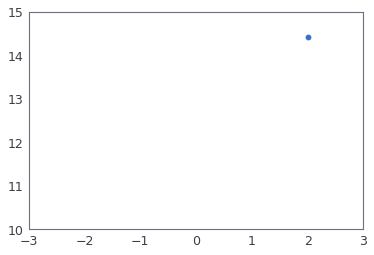

In [164]:
ic=4
OCc=0
vindex=0
eLSRs,evols = evolsA2
oooc = oooA2
c_galac = np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc][ic]])
v_galac = np.array([oc.vcart2vgalactic(xv[0:3],eLSRs[ic][0:3],xv[3::],eLSRs[ic][3::])*mt.C.kpc.express(mt.C.km) for xv in np.array(evols[OCc][ic])])  
fft_vi=np.fft.fft(v_galac[:,vindex]/c_galac[:,0])
#plt.scatter(np.fft.fftfreq(len(fft_vi),d=1./len(fft_vi)),2./len(fft_vi)*fft_vi.real)
plt.scatter(np.fft.fftfreq(len(fft_vi),d=1./len(fft_vi)),2./len(fft_vi)*fft_vi.imag)
plt.xlim(-3,3)
plt.ylim(10,15)

In [85]:
fft_vi=np.fft.fft(v_galac[:,vindex])

(-3, 3)

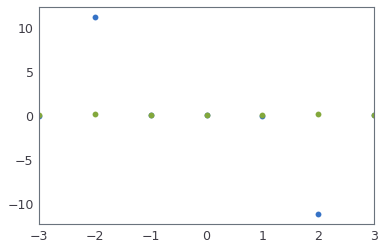

In [70]:
wprueba = 2
nprueba=500.
ttprueba = np.linspace(0,2*np.pi,nprueba)
#plt.plot(np.fft.fftfreq(len(ttprueba),d=1./500),2./np.pi/2.*np.sqrt(np.fft.fft(np.sin(wprueba*ttprueba))*np.fft.fft(np.sin(wprueba*ttprueba)).conj()))  
plt.scatter(np.fft.fftfreq(len(ttprueba),d=1./nprueba),2./nprueba*np.fft.fft(np.sin(wprueba*ttprueba)).imag )
plt.scatter(np.fft.fftfreq(len(ttprueba),d=1./nprueba),2./nprueba*np.fft.fft(np.sin(wprueba*ttprueba)).real )
#plt.plot(np.fft.fftfreq(len(ttprueba),d=1./500),[np.linalg.norm(2./np.pi/2.*z) for z in np.fft.fft(np.sin(wprueba*ttprueba))],c='r')  
plt.xlim(-3,3)


In [26]:
asd = np.f
ft.fft(np.sin(wprueba*ttprueba))

In [27]:
max(np.fft.fft(np.sin(wprueba*ttprueba),norm='ortho').real),max(np.fft.fft(np.sin(wprueba*ttprueba),norm='ortho').imag)

(0.1403482401784377, 11.167970193800876)

In [138]:
np.shape(evols)

(8, 11, 100, 6)

In [201]:
oooA2[0]

array([-14.44962514, -13.93887707,   0.        ,   0.        ])

In [243]:
OCc=7
eLSRs,evols = evolsA2
oooc = oooA2
OOCC = []
for ic in range(11):
    OOCCa = []
    c_galac = np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc][ic]])
    v_galac = np.array([oc.vcart2vgalactic(xv[0:3],eLSRs[ic][0:3],xv[3::],eLSRs[ic][3::])*mt.C.kpc.express(mt.C.km) for xv in np.array(evols[OCc][ic])])  
    fft_vr=np.fft.fft(v_galac[:,0]/c_galac[:,0])
    fft_vl=np.fft.fft(v_galac[:,1]/c_galac[:,0])
    OOCCa.append(-2./len(fft_vr)*fft_vr.imag[2])
    OOCCa.append(2./len(fft_vl)*fft_vl.real[2])
    OOCCa.append(1./len(fft_vl)*fft_vl.real[0])
    OOCCa.append(2./len(fft_vr)*fft_vr.real[2])
    OOCCa.append(2./len(fft_vl)*fft_vl.imag[2])
    OOCCa.append(1./len(fft_vr)*fft_vr.real[0])
    OOCC.append(OOCCa)
OOCC = np.array(OOCC)
print oooc[OCc]
labs=["$A_r$","$A_l$","$B_l$","$C_r$","$C_l$","$K_r$"]

[ 13.55037486 -13.93887707   0.           0.        ]


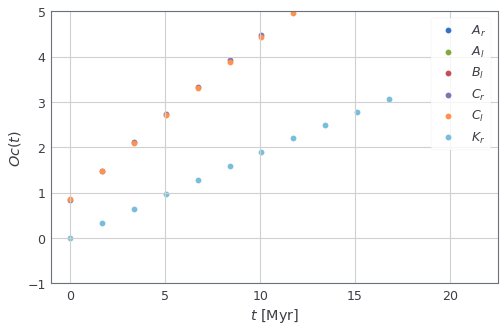

In [246]:
plt.figure(figsize=(8,5))
for i in range(len(OOCC[0])):
    plt.scatter(np.array(range(len(OOCC.T[i])))*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6,OOCC.T[i],label=labs[i])
plt.xlabel(r"$t$ [Myr]")
plt.ylabel(r"$Oc(t)$")
plt.legend()
plt.xlim(-1,22.5)
plt.ylim(-1,5)
plt.grid(True)
plt.show()

In [231]:
eLSRs,evols = evolsA2
oooc = oooA2
OOCC = []
for ic in range(11):
    OOCCa = []
    for OCc in range(8):
        c_galac = np.array([oc.cart2galactic(c[:3:],eLSRs[ic][:3:]) for c in evols[OCc][ic]])
        v_galac = np.array([oc.vcart2vgalactic(xv[0:3],eLSRs[ic][0:3],xv[3::],eLSRs[ic][3::])*mt.C.kpc.express(mt.C.km) for xv in np.array(evols[OCc][ic])])  
        fft_vr=np.fft.fft(v_galac[:,0]/c_galac[:,0])
        fft_vl=np.fft.fft(v_galac[:,1]/c_galac[:,0])
        OOCCa.append(-2./len(fft_vr)*fft_vr.imag[2])
    OOCC.append(OOCCa)
OOCC = np.array(OOCC)
labs=["$A_r$=%g"%ooc[0] for ooc in oooc]

In [232]:
OOCC

array([[-14.3388215 , -10.36949458,  -6.40016767,  -2.43084075,
          1.53848617,   5.50781308,   9.47714   ,  13.44646692],
       [-14.43745211, -10.462878  ,  -6.48831667,  -2.51377646,
          1.46073432,   5.43520739,   9.40963448,  13.38400735],
       [-14.48388155, -10.5182268 ,  -6.55242333,  -2.58650351,
          1.37950024,   5.34555545,   9.31162969,  13.27769065],
       [-14.4793509 , -10.53652477,  -6.59319803,  -2.64943898,
          1.29468307,   5.23909819,   9.18373611,  13.12852654],
       [-14.42640716, -10.51978851,  -6.61211944,  -2.70351106,
          1.20592197,   5.1160623 ,   9.02679077,  12.93798734],
       [-14.32872034, -10.47092939,  -6.61133244,  -2.75008663,
          1.11264223,   4.97668131,   8.84185257,  12.70797473],
       [-14.19083502, -10.39356606,  -6.59350976,  -2.790874  ,
          1.01411668,   4.82122347,   8.63019634,  12.44077735],
       [-14.01786694, -10.2917943 ,  -6.56168223,  -2.82780395,
          0.90954007,   4.6500249

In [ ]:
plt.figure(figsize=(8,5))
for i in range(len(OOCC[0])):
    plt.scatter(np.array(range(len(OOCC.T[i])))*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6,OOCC.T[i],label=labs[i])
plt.xlabel(r"$t$ [Myr]")
plt.ylabel(r"$Oc(t)$")
plt.legend()
plt.xlim(-1,22.5)
plt.show()